# Feature analysis

### 1. Load dataset

In [1]:
import pandas as pd

data = pd.read_csv('../../data/train.csv')

### 2. Look over dataset

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [3]:
data.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [4]:
## check missing value
data.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

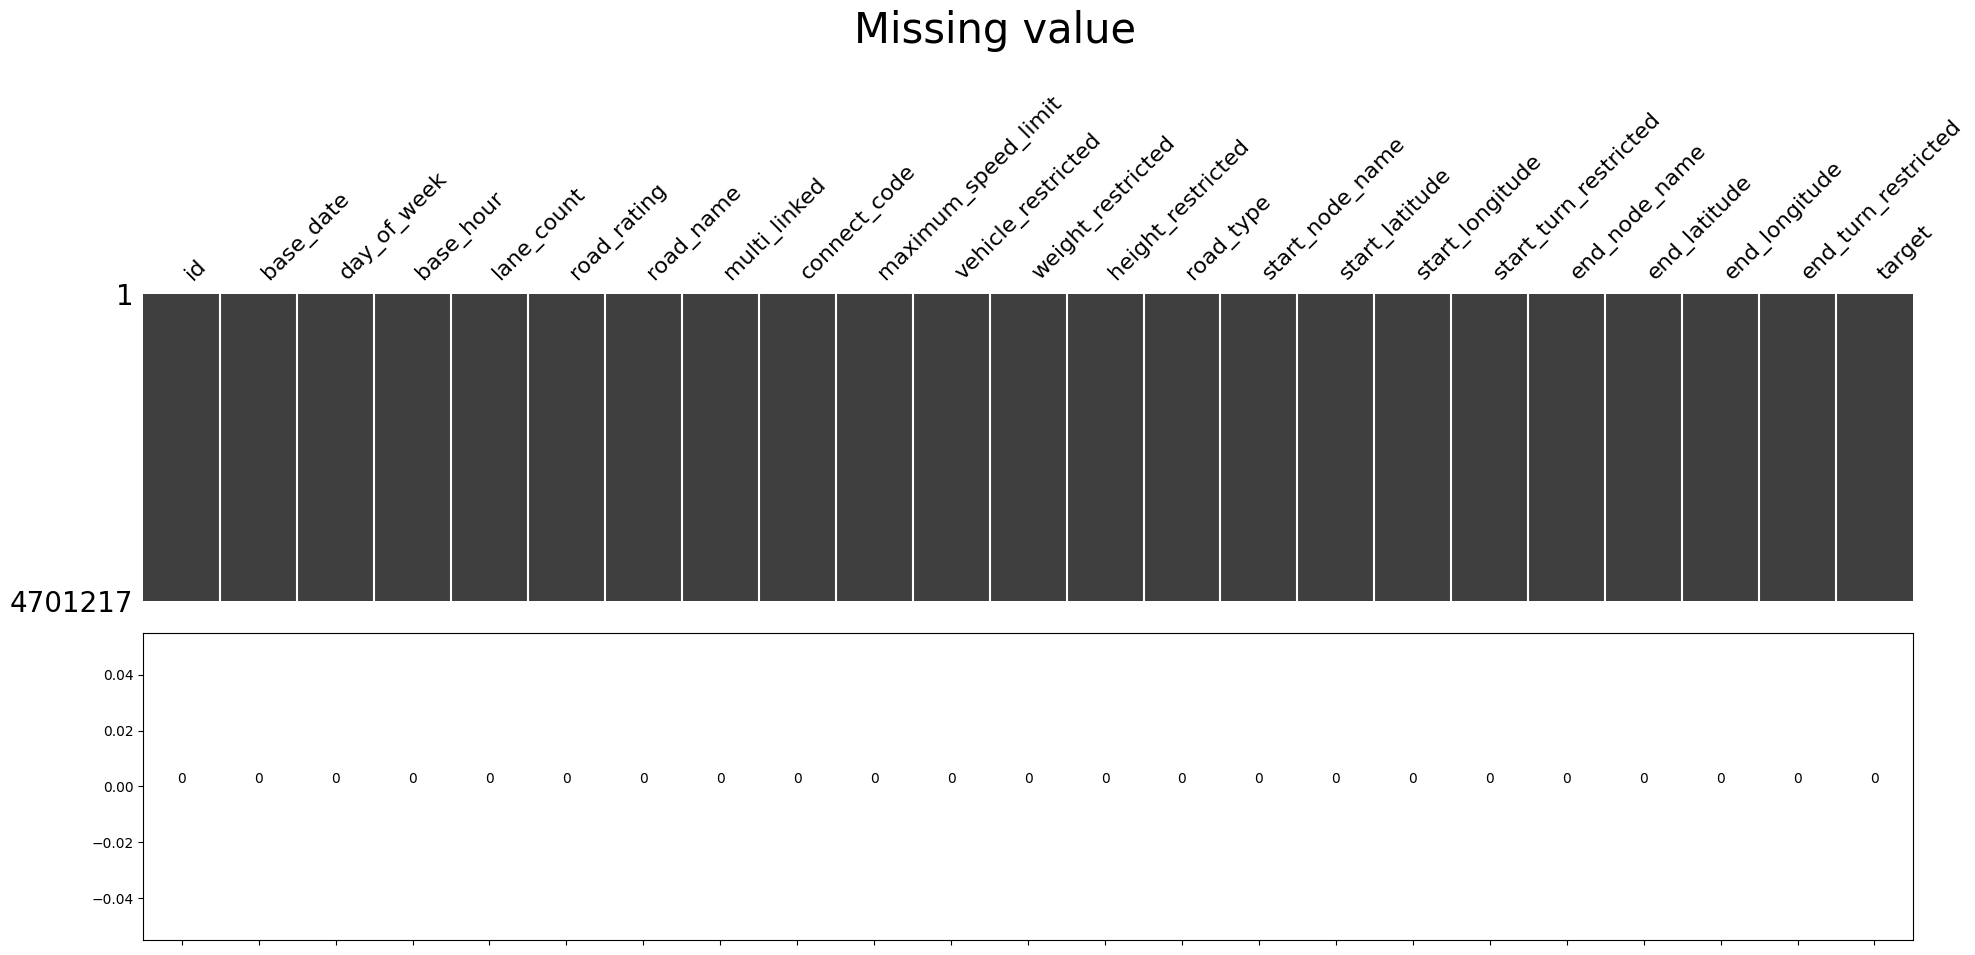

In [5]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(2, 1, figsize=(20, 10))
msno.matrix(data, ax=axes[0]);
ms = data.isnull().sum()
sns.barplot(x=ms.index, y=ms.values, ax=axes[1]);
axes[1].bar_label(axes[1].containers[0])
axes[1].set_xticklabels([])
fig.suptitle("Missing value", fontsize=30)
fig.tight_layout(rect=(0, 0.03, 1, 0.97))
plt.show()
plt.close(fig)

---

### 3. Feature distribution

In [6]:
import numpy as np
from pandas.api.types import is_numeric_dtype

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

In [7]:
def plot_fn_num(data_f, ax):
    if len(data_f.dropna()) == 0:
        return
    sns.histplot(data_f, bins=50, ax=ax, kde=True, stat='density')

def plot_fn_cat(data_f, ax):  # cat: not numerical dtypes
    if len(data_f.dropna()) == 0:
        return
    
    try:
        data_f.astype('float32')
    except:
        try:
            pd.to_datetime(data_f)
            sns.histplot(data_f, bins=50, ax=ax, kde=True, stat='density')
            ax.tick_params(axis='x', labelrotation=30)
        except:
            cnts = data_f.value_counts(normalize=True).sort_index()
            sns.barplot(x=cnts.index, y=cnts.values, order=cnts.index, ax=ax)
            xticklabels = cnts.sort_values()[-10:].index
            ax.set_xticks(list(map(lambda l: cnts.index.get_loc(l), xticklabels)))
            ax.set_xticklabels(xticklabels, rotation=30, ha='right', rotation_mode='anchor')

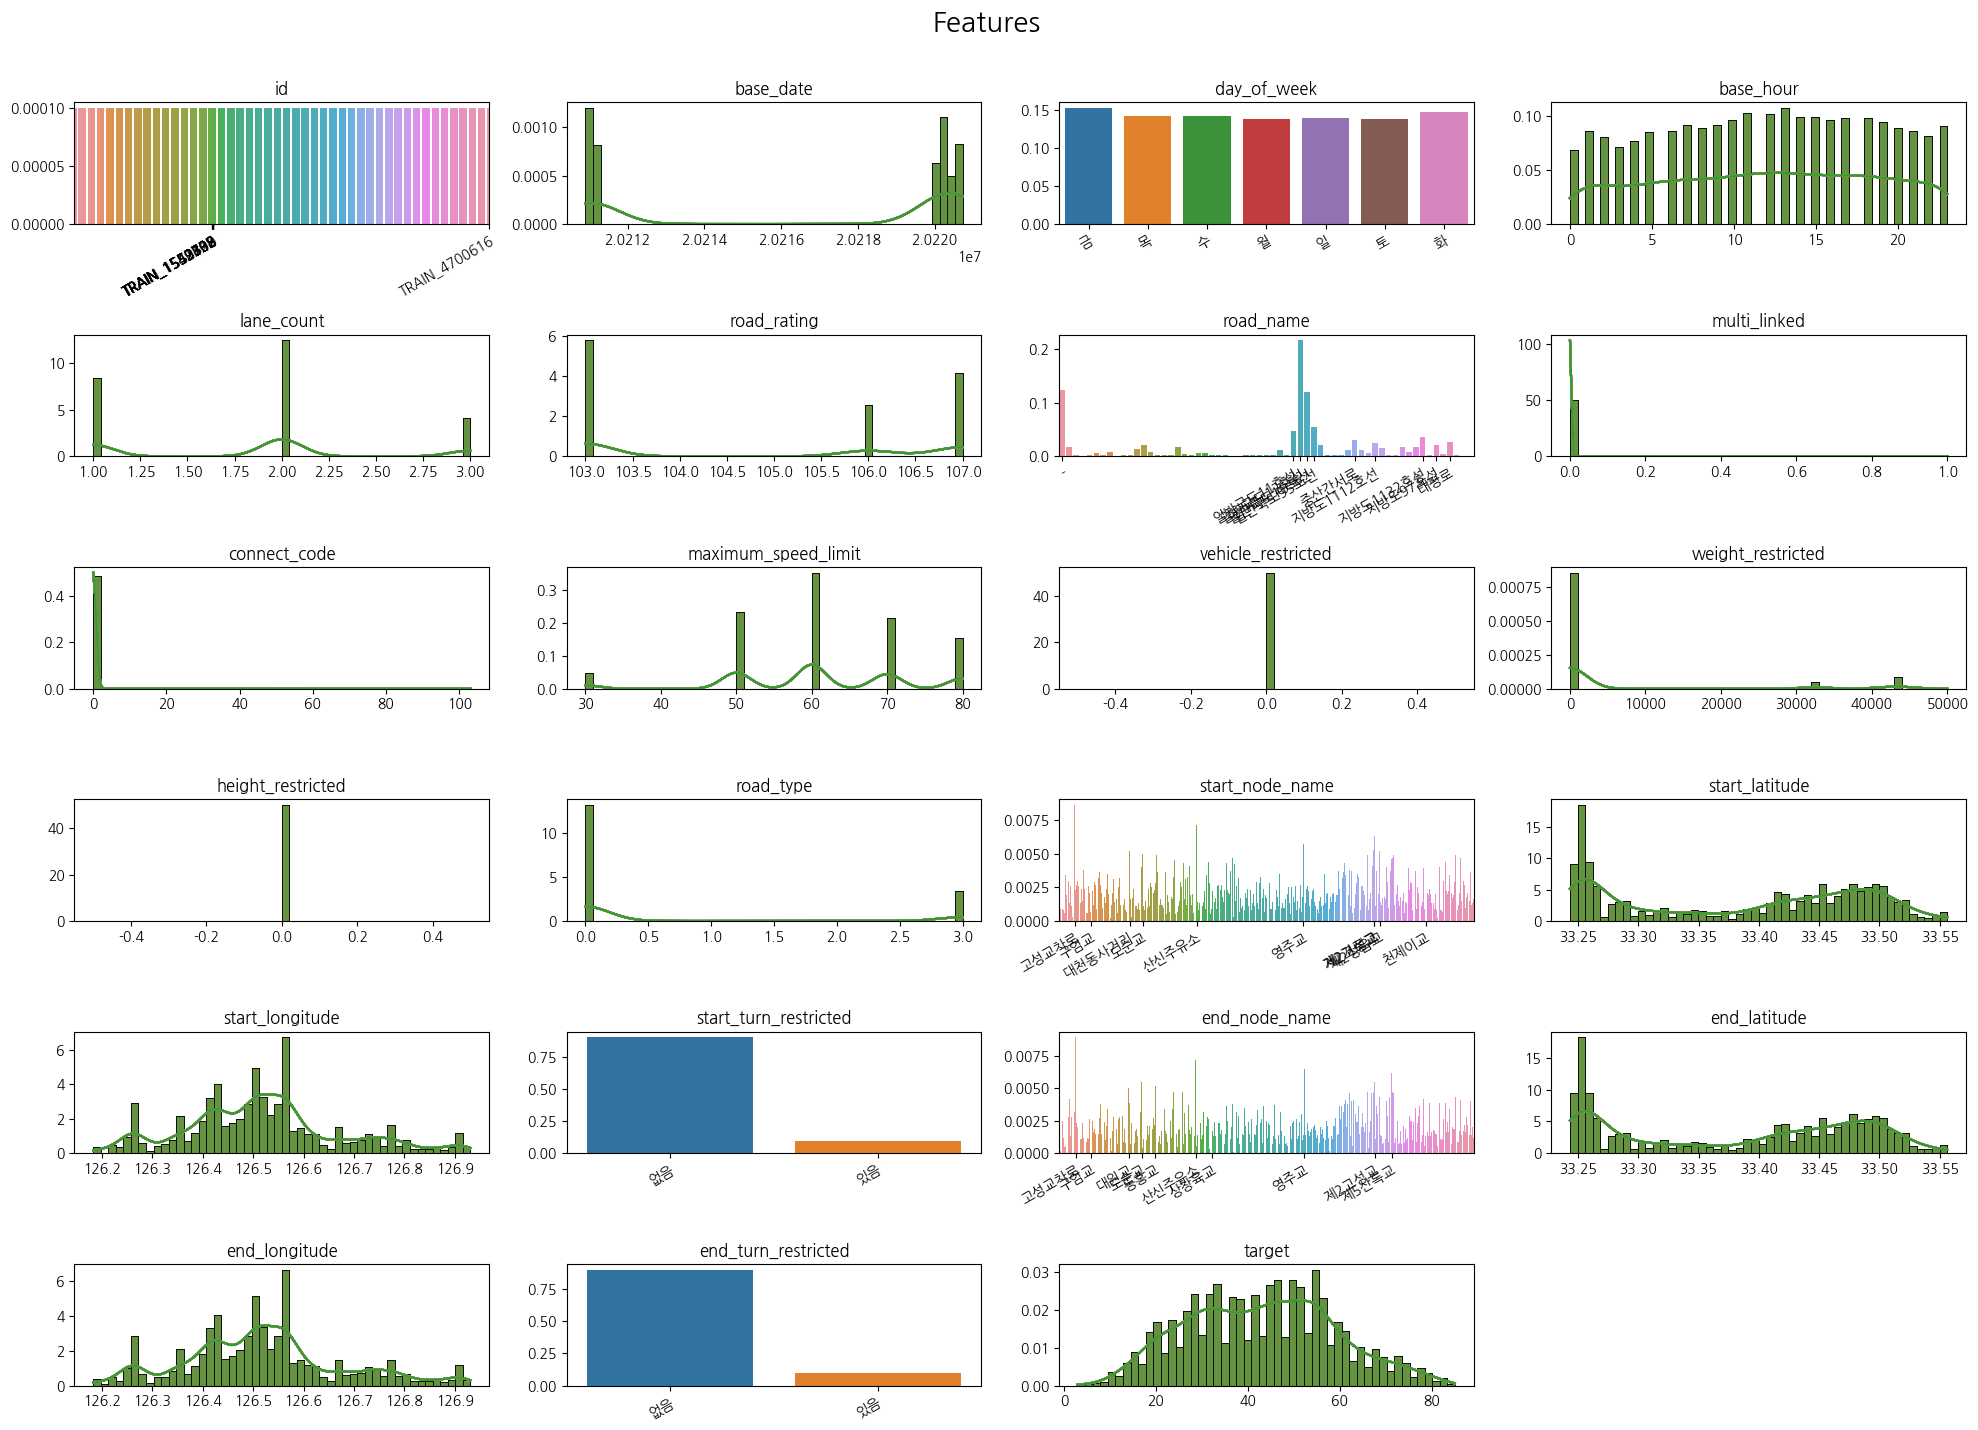

In [8]:
sample = data.sample(10000, random_state=42)

n_features = len(sample.columns)
n_cols = 4
n_rows= int(np.ceil(n_features / n_cols))
bins = 50
figsize = (20, 15)
fontsize = 20
Title = "Features"

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

for ax in axes.flat[n_features:]:
    ax.axis('off')

for ax, f in zip(axes.flat, sample):
    for d in sample:
        if is_numeric_dtype(sample[f]):
            plot_fn_num(sample[f], ax)
            title = f
        else:
            plot_fn_cat(sample[f], ax)
            title = f

    ax.set_title(title)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

fig.suptitle(Title, fontsize=fontsize)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
plt.close(fig)

--------------------

### 4. Data Specification

- 4,701,217 entries
- 23 columns
<br> <br/>
- Index
    * id
<br> <br/>
- Label
    * target
<br> <br/>
- Spacetime
    * base_hour : 00 ~ 23시 모든 시간대 분포 비슷                                              (사실상 categorical & ordinal)
    * base_date : 연도, 날짜 정보(샘플별로 sequence 하진 않음)(numerical로 분류되지만 사실 categorical & ordinal)
    * day_of_week : 월 ~ 일, 각 요일마다 샘플 비율 비슷                                        (사실상 categorical & ordinal)
    * start_latitude
    * start_longitude
    * end_latitude
    * end_longitude
<br> <br/>
- Numerical(continuous 없음)
    * vehicle_restricted : 모든 값 0
    * height_restricted : 모든 값 0
    * maximum_speed_limit : [30, 40, 50, 60, 70, 80] 6가지 값 가짐                              (사실상 categorical & ordinal)
    * weight_restricted : 대부분 값이 0이고, 나머지 값은 [32400, 43200, 50000]                  (사실상 categorical & ordinal)
    * multi_linked : 거의 모든 값이 0, 극히 일부 1                                              (사실상 categorical & nominal)
    * connect_code : 거의 모든 값이 0, 극히 일부 103                                            (사실상 categorical & nominal)
    * road_rating : 도로 등급은 101 ~ 107까지 7개 분류지만 [103, 106, 107] 세 가지 값만 가짐    (사실상 categorical & nominal)
    * road_type : 도로 유형은 000 ~ 004까지 5가지 분류지만 [0, 3] 두 값만 가짐                  (사실상 categorical & nominal)
    * lane_count : 1, 2, 3 차선                                                                 (사실상 categorical & ordinal)
<br> <br/>
- Categorical
    * road_name : 61가지 도로명 존재                                                            (categorical & nominal)
    * start_node_name : 487가지 시작지점 존재                                                   (categorical & nominal)
    * end_node_name : 487가지 종료지점 존재                                                     (categorical & nominal)
    * start_turn_restricted : 있음, 없음 두 값 가짐(1:10 비율)                                  (categorical & nominal)
    * end_turn_restricted : 있음, 없음 두 값 가짐(1:10 비율)                                    (categorical & nominal)

---

### 5. Feature vs Target

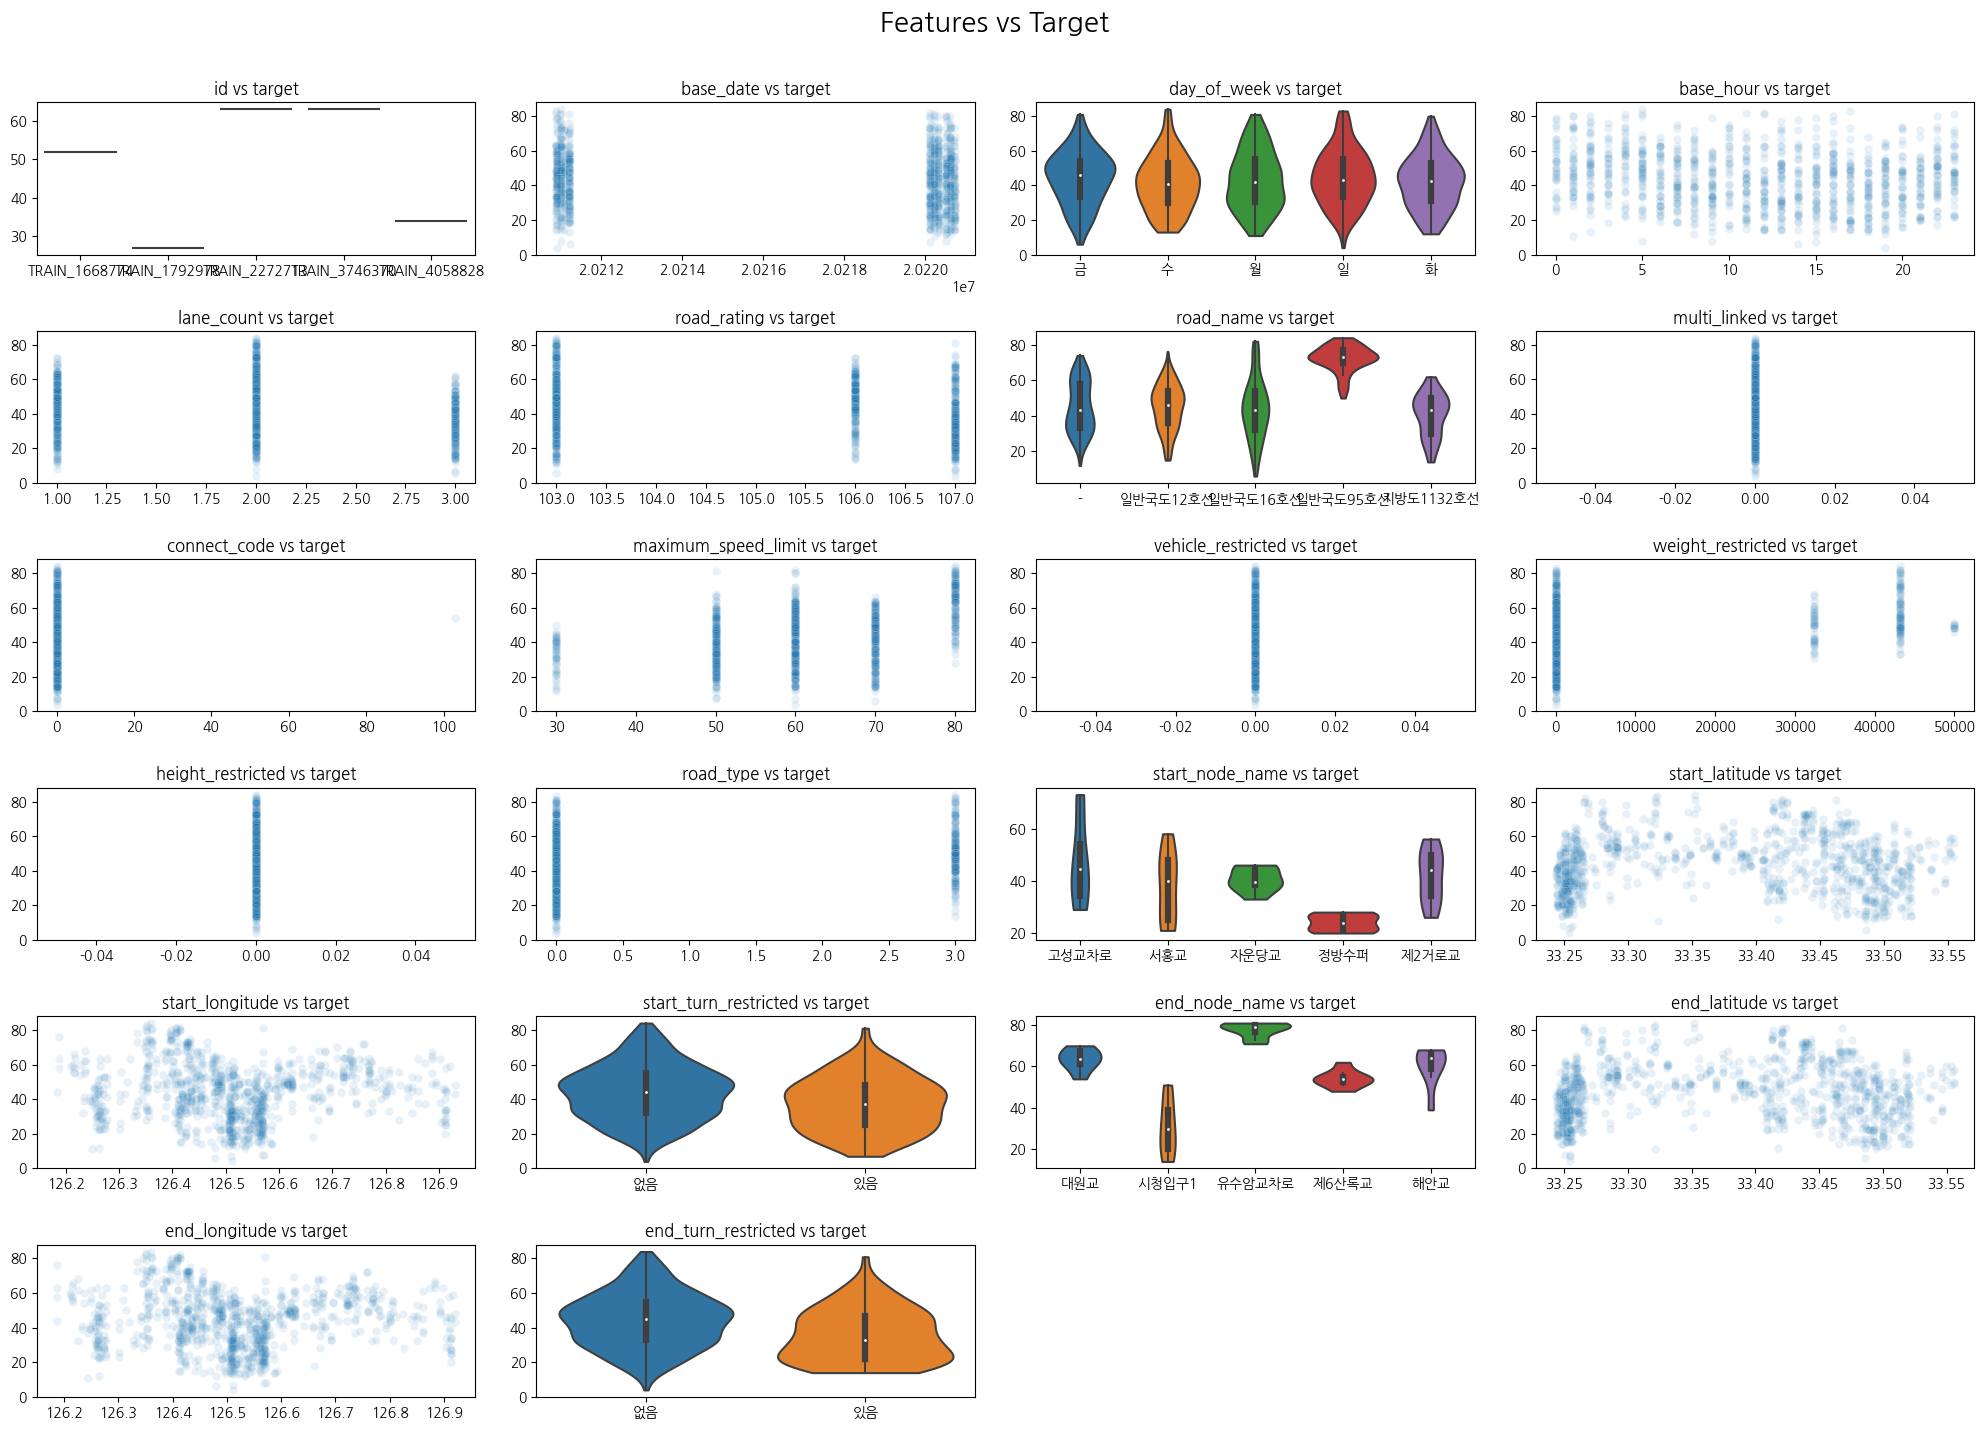

In [9]:
n_cols = 4
n_features = len(data.columns) - 1  # -1: except target
n_rows     = int(np.ceil(n_features/n_cols))
figsize = (20, 15)
fontsize = 20
Title = "Features vs Target"

sample = data.sample(1000, random_state=42)

fig, axes  = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = np.array(axes) if n_rows * n_cols == 1 else axes

for ax in axes.flat[n_features:]:
    ax.axis('off')
    
for ax, f in zip(axes.flat, sample.columns.drop("target")):
    if is_numeric_dtype(sample[f]):
        if is_numeric_dtype(sample['target']):
            sns.scatterplot(x=sample[f], y=sample['target'], alpha=0.1, ax=ax)
        else:
            selected_classes = sample['target'].value_counts().index[:5]
            idxs_selected    = sample['target'][sample['target'].isin(selected_classes)].index
            sample_f1, sample_f2 = sample[f][idxs_selected], sample['target'][idxs_selected]
            sns.violinplot(x=sample_f1, y=sample_f2, ax=ax, orient='h', order=reversed(sorted(selected_classes)), cut=0)
    else:
        if is_numeric_dtype(sample['target']):
            selected_classes = sample[f].value_counts().index[:5]
            idxs_selected    = sample[f][sample[f].isin(selected_classes)].index
            sample_f1, sample_f2 = sample[f][idxs_selected], sample['target'][idxs_selected]
            sns.violinplot(x=sample_f1, y=sample_f2, ax=ax, orient='v', order=sorted(selected_classes), cut=0)
        else:
            ratio = pd.crosstab(sample['target'], sample[f], normalize='columns')  # normalize is in ['index', 'columns', 'all']
            ratio.sort_index(inplace=True, ascending=False)  # sort by index
            ratio = ratio[sorted(ratio)]                     # sort by column
            ratio = ratio.iloc[:5, :5]
            sns.heatmap(ratio, ax=ax, annot=True, fmt=".2f", cmap=sns.light_palette('firebrick', as_cmap=True), cbar=False)
        
    ax.set_title(f"{f} vs target")
    ax.set_xlabel(None);  ax.set_ylabel(None)
    
fig.suptitle(Title, fontsize=fontsize)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
plt.close(fig)

----

### 6. Correlation matrix

/tmp/ipykernel_18673/3736645678.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask_mat = np.eye(len(sample.corr()), dtype=bool)
/tmp/ipykernel_18673/3736645678.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample.corr(), mask=mask_mat, ax=ax, annot=True, fmt=".2f", cmap='coolwarm', center=0)


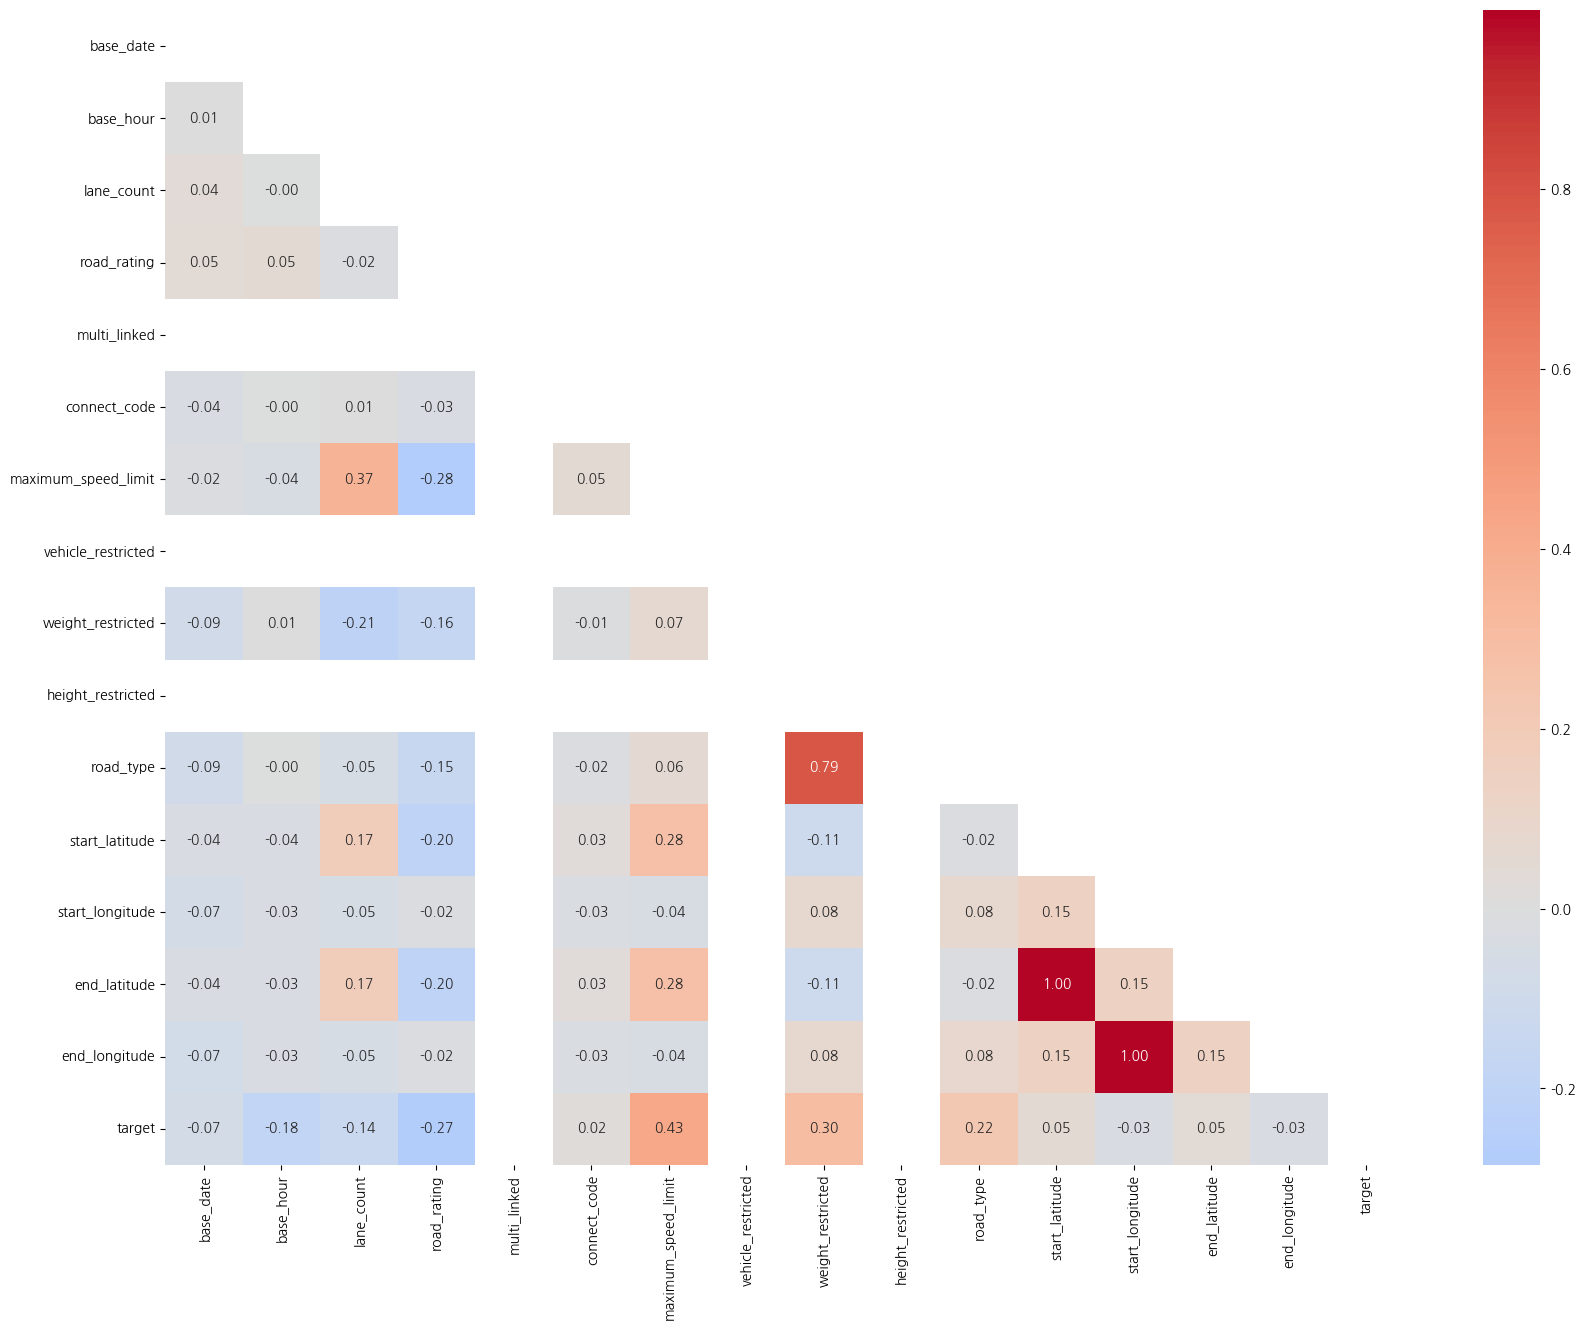

In [10]:
Title = "Correlation matrix"

figsize = (20, 15)

sample = data.sample(1000, random_state=42)

fig, ax = plt.subplots(figsize=figsize)

mask_mat = np.eye(len(sample.corr()), dtype=bool)
mask_mat[np.triu_indices_from(mask_mat, k=1)] = True
sns.heatmap(sample.corr(), mask=mask_mat, ax=ax, annot=True, fmt=".2f", cmap='coolwarm', center=0)

ax.set_xlabel(None), ax.set_ylabel(None);

------

### 7. Feature importance

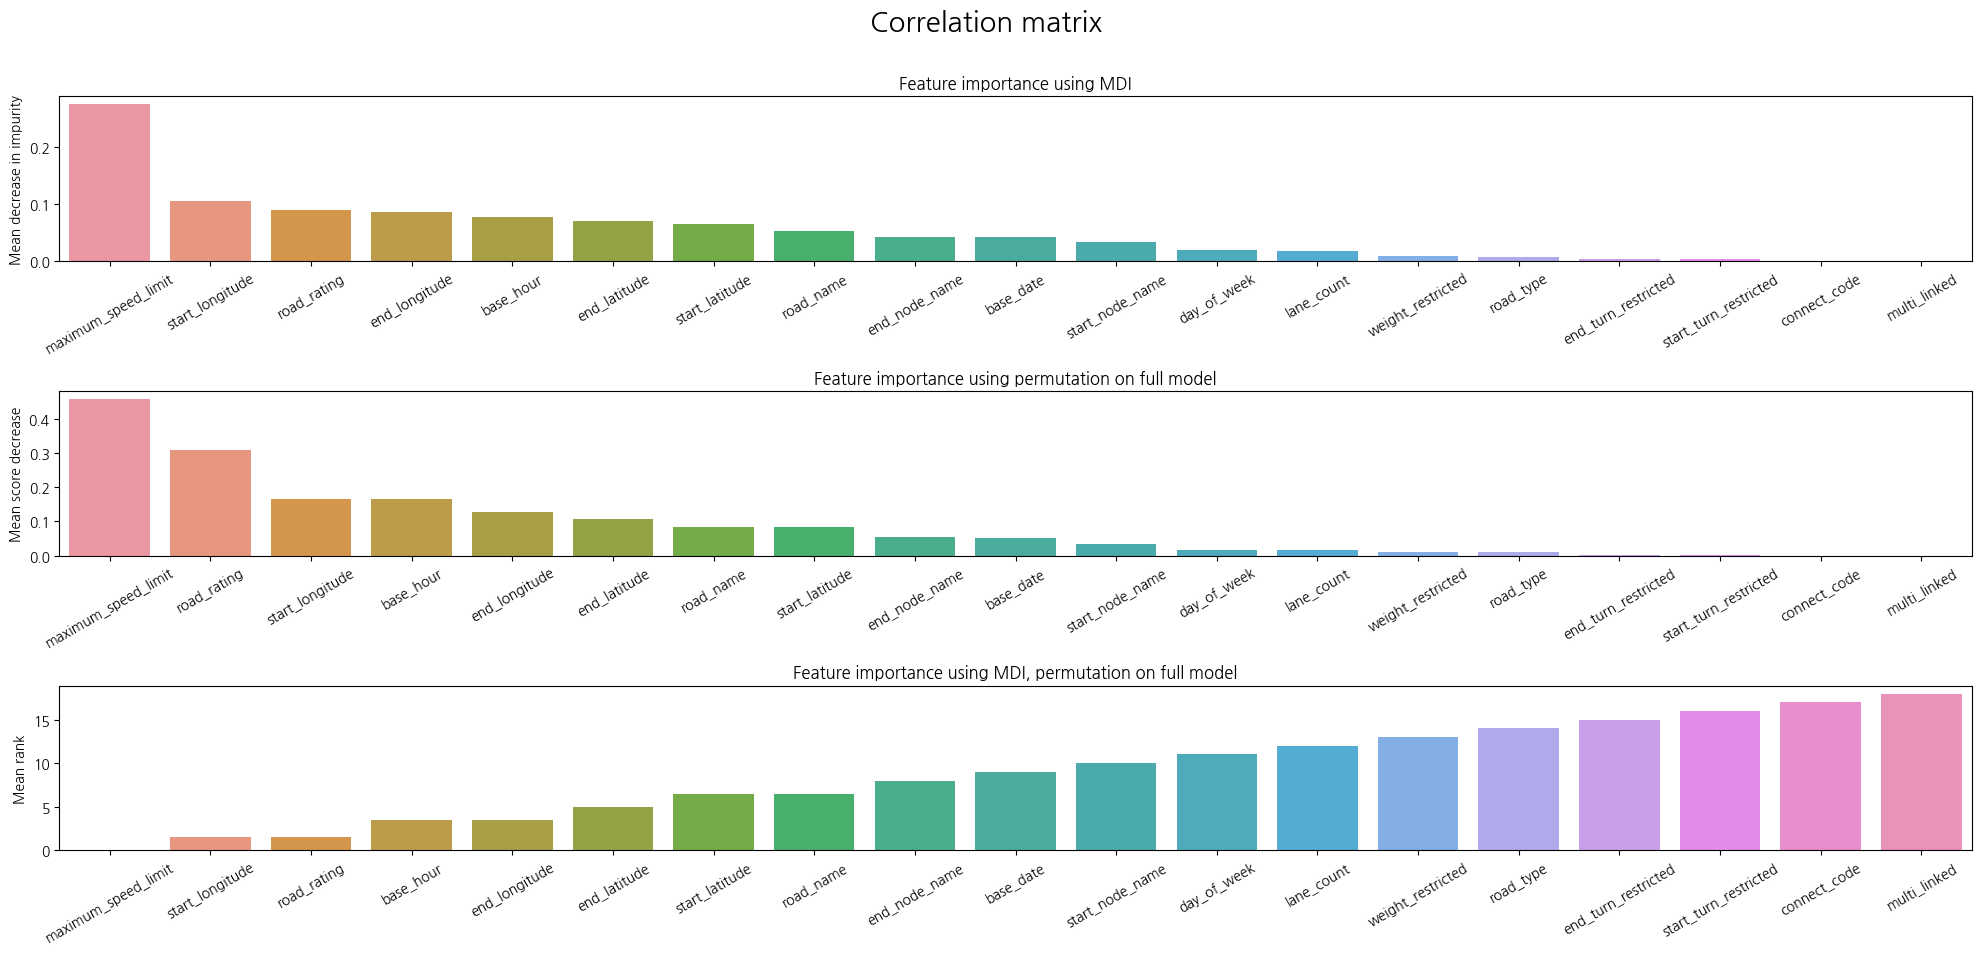

In [11]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

sample = data.sample(1000, random_state=42)

# 1. Feature encoding

    ## drop dummy features
drop_features = ['id', 'vehicle_restricted', 'height_restricted']
sample.drop(drop_features, axis=1, inplace=True)

    ## nominal categorical features(over two class) --> OneHotEncoder
    ## 여기서는 단순히 LabelEncoder를 통해 인코딩 후 importance 확인
cat_nom_features = ['road_name', 'start_node_name', 'end_node_name']
sample[cat_nom_features] = sample[cat_nom_features].apply(LabelEncoder().fit_transform)

    ## nominal categorical features(two class) --> LabelEncoder
binary_features = ['start_turn_restricted', 'end_turn_restricted']
sample[binary_features] = sample[binary_features].apply(LabelEncoder().fit_transform)

    ## ordinal categorical features --> OrdinalEncoder
cat_ord_features = ['base_hour', 'base_date', 'day_of_week']
categories = [sorted(sample[col].unique()) for col in cat_ord_features]
categories[2] = ['월', '화', '수', '목', '금', '토', '일']
encoder = OrdinalEncoder(categories=categories)
sample[cat_ord_features] = encoder.fit_transform(sample[cat_ord_features])

# 2. Split data into X, y
X, y = sample.drop(columns='target'), sample['target']

# 3. Model (for Regression problem)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X, y)

# 4. Get feature importance
MDI_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
perm_importance = pd.Series(permutation_importance(model, X, y).importances_mean, index=X.columns).sort_values(ascending=False)

# 5. Mean importance
fi1 = pd.Series(range(len(MDI_importance)), index=MDI_importance.index, name='MDI')
fi2 = pd.Series(range(len(perm_importance)), index=perm_importance.index, name='Permutation')
mean_fi = pd.Series(((fi1 + fi2)/2).sort_values(), name='Mean')

# 6. Plot
bins = 50
fontsize = 20
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

for ax, d, ylabel, title in zip(axes,
                                  [MDI_importance.head(bins), perm_importance.head(bins), mean_fi.head(bins)],
                                  ["Mean decrease in impurity", "Mean score decrease", "Mean rank"],
                                  ["Feature importance using MDI", "Feature importance using permutation on full model", 
                                   "Feature importance using MDI, permutation on full model"]):
    sns.barplot(x=d.index, y=d, ax=ax)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=30)
    
fig.suptitle(Title, fontsize=fontsize)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
plt.close(fig)

-----------

### 8. Target(=speed) by 'day_of_week' and 'base_hour'

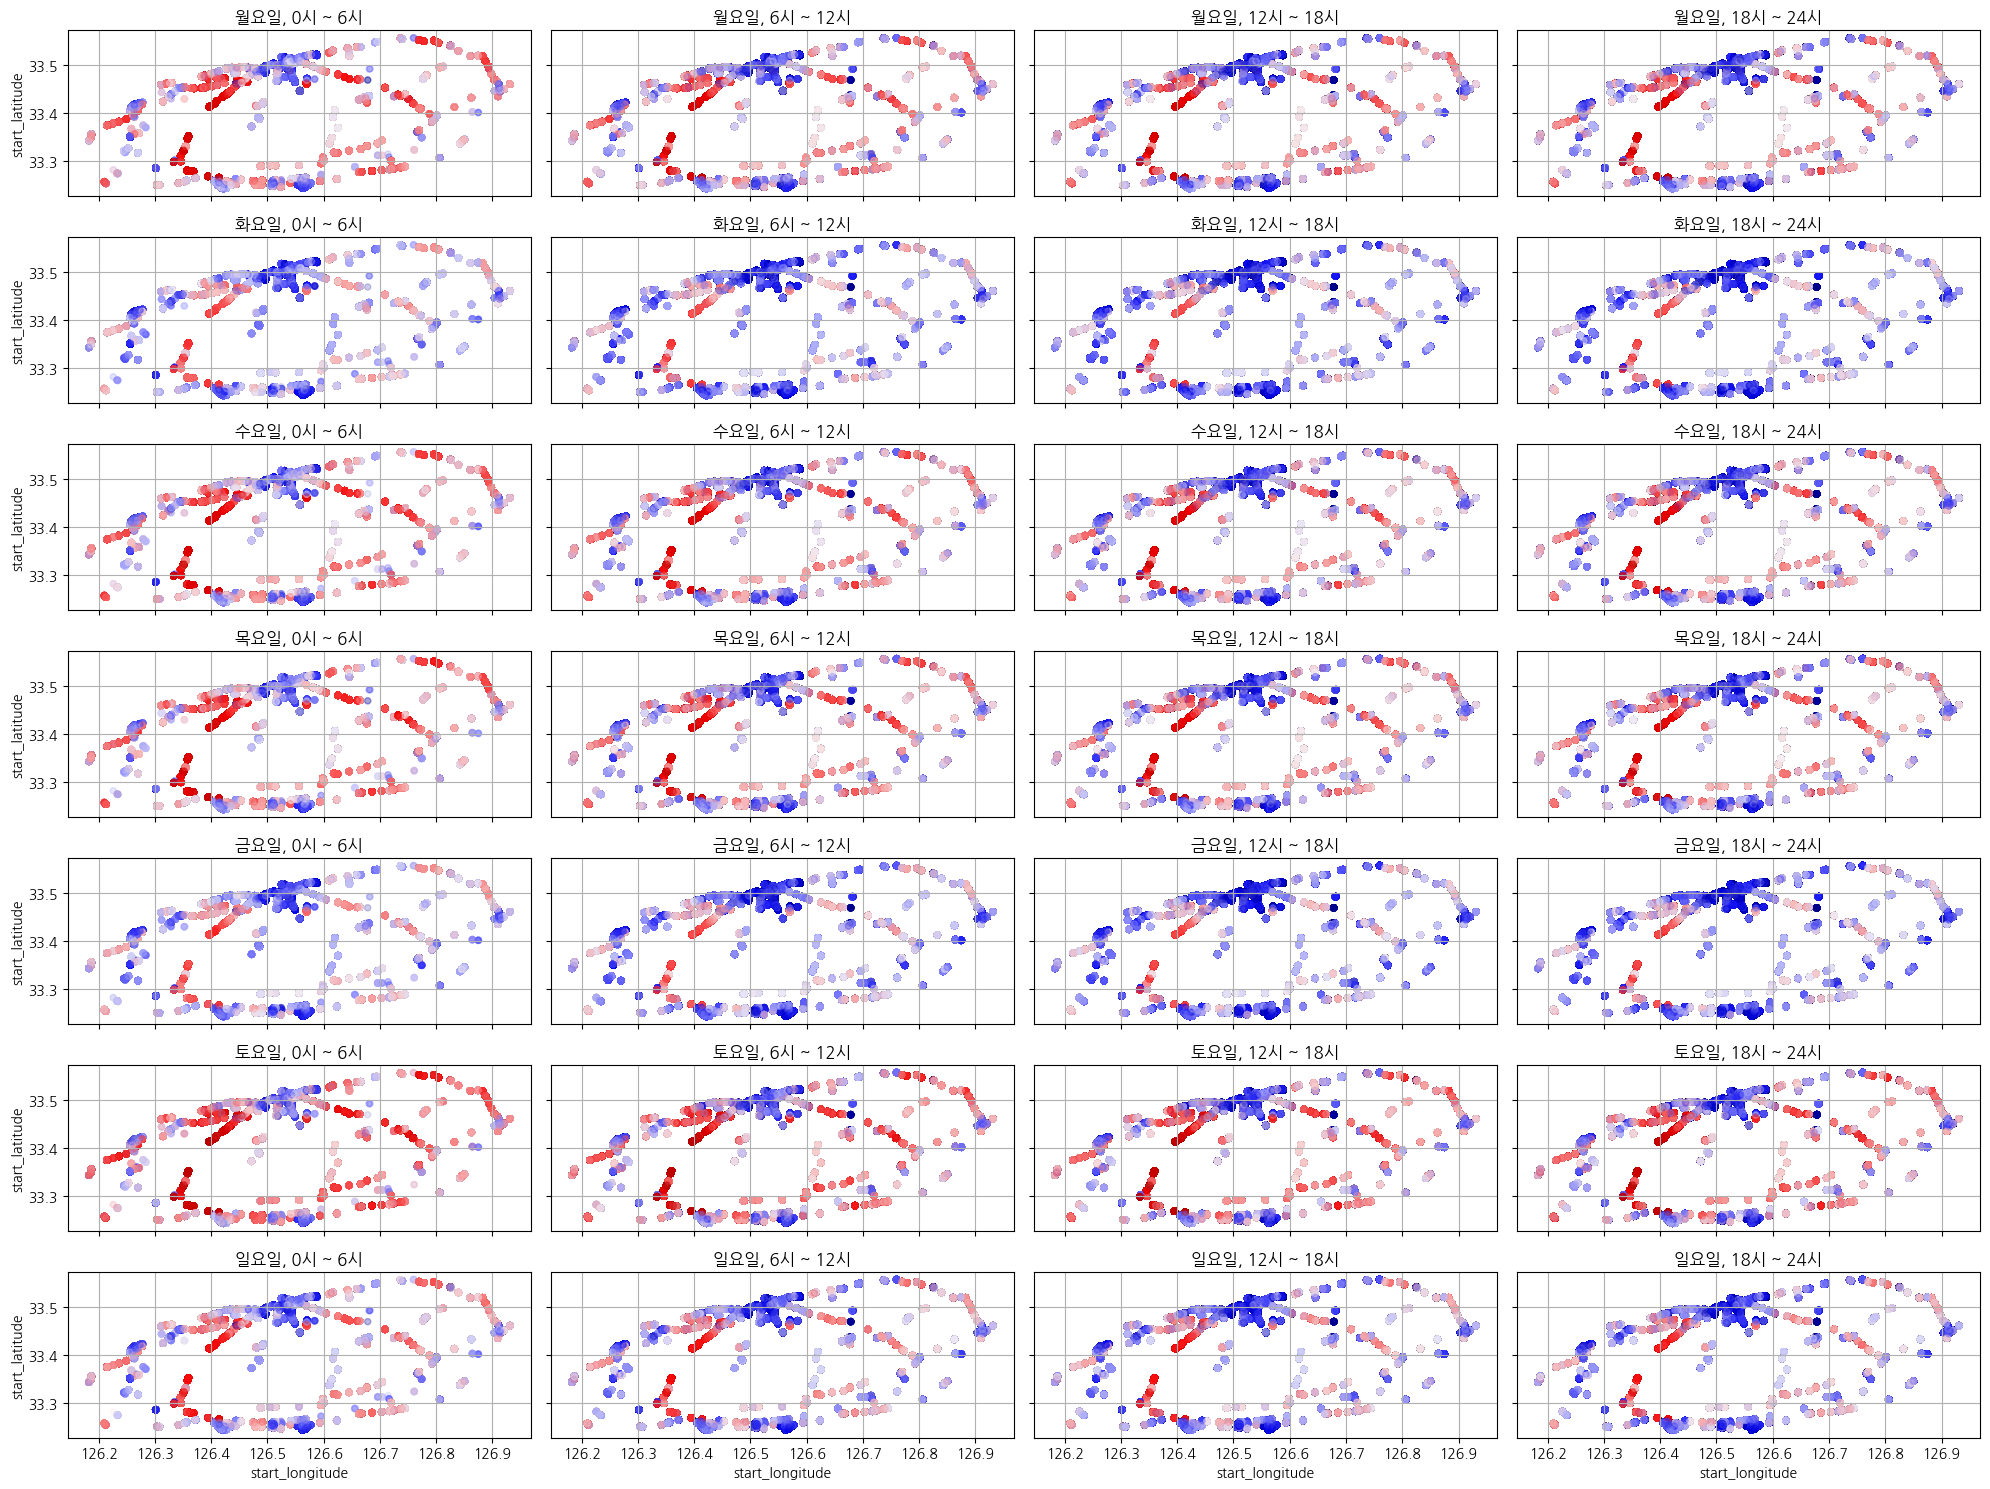

In [12]:
from itertools import product

n_rows, n_cols = 7, 4  # 7일, day quarter
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
for ax, (week, hour) in zip(axes.flat, product('월화수목금토일', [6, 12, 18, 24])):
    data.loc[(data['base_hour'] < hour) & (data['day_of_week'] == week)].plot(kind='scatter', 
                                                                                             x='start_longitude', 
                                                                                             y='start_latitude',
                                                                                             alpha=0.1,  
                                                                                             c='target', 
                                                                                             cmap='seismic', 
                                                                                             colorbar=False,
                                                                                             ax=ax)
    ax.set_title('{}요일, {}시 ~ {}시'.format(week, hour - 6, hour))
    if hour != 6:
        ax.set_yticklabels([]), ax.set_ylabel(None)
    if week != '일':
        ax.set_xticklabels([]), ax.set_xlabel(None)
    ax.grid()
fig.tight_layout()
plt.show()

-----------------